a) Plotten der Funktionen

/var/folders/f8/n7j15w316vd5qyhxb5xh7p700000gn/T/ipykernel_82663/637960591.py:10: RuntimeWarning: invalid value encountered in log
  y3 = np.log(np.sin(x))


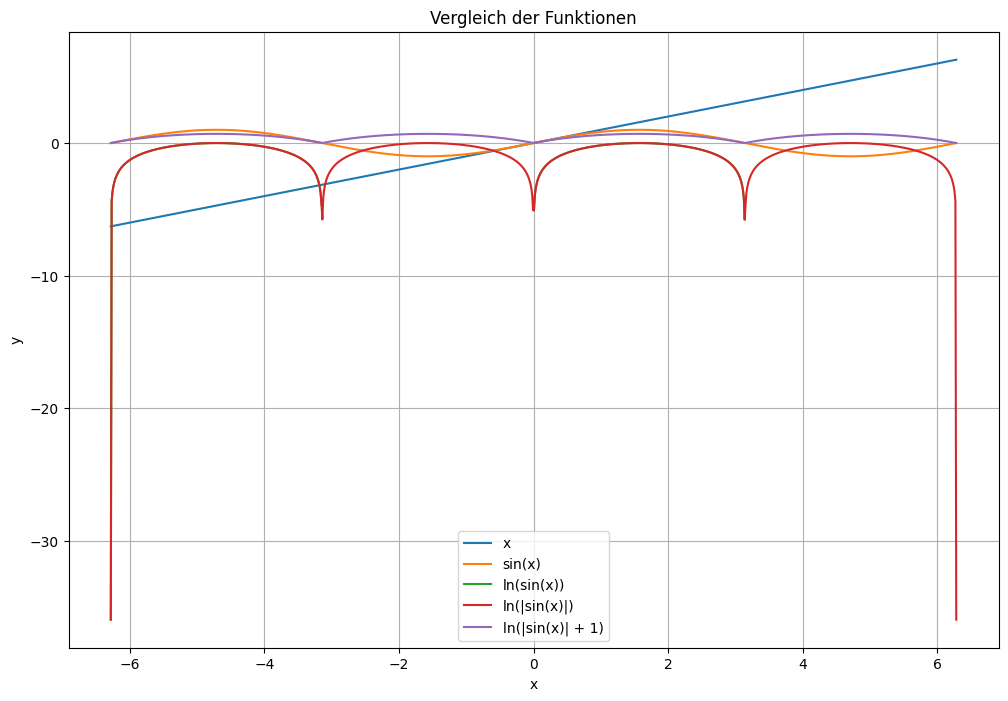

In [236]:
import numpy as np
import matplotlib.pyplot as plt

# Wertebereich für x
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

# Berechnung der Funktionen
y1 = x
y2 = np.sin(x)
y3 = np.log(np.sin(x))
y4 = np.log(np.abs(np.sin(x)))
y5 = np.log(np.abs(np.sin(x)) + 1)

# Plotten der Funktionen
plt.figure(figsize=(12, 8))
plt.plot(x, y1, label='x')
plt.plot(x, y2, label='sin(x)')
plt.plot(x, y3, label='ln(sin(x))')
plt.plot(x, y4, label='ln(|sin(x)|)')
plt.plot(x, y5, label='ln(|sin(x)| + 1)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vergleich der Funktionen')
plt.legend()
plt.grid(True)
plt.show()


b) Sweep Sprachsignale

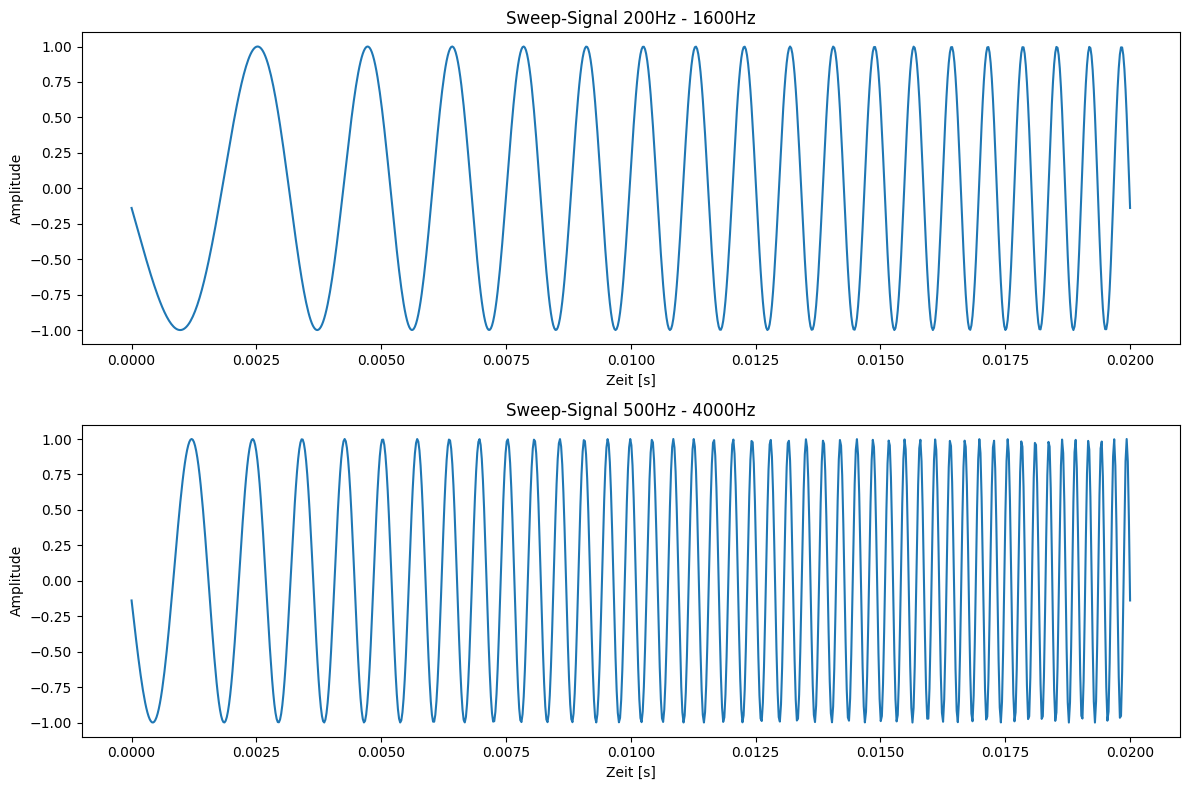

In [237]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
fs = 44100  # Abtastrate
t = 0.02  # Dauer in Sekunden
f_start1, f_end1 = 200, 1600
f_start2, f_end2 = 500, 4000

# Zeitvektor
time = np.linspace(0, t, int(fs * t))

# Zufällige Phase
phi = np.random.rand() * 2 * np.pi

# Sweep-Signale
sweep1 = np.sin(2 * np.pi * (f_start1 + (f_end1 - f_start1) * time / (2 * t)) * time + phi)
sweep2 = np.sin(2 * np.pi * (f_start2 + (f_end2 - f_start2) * time / (2 * t)) * time + phi)

# Plotten der Sweep-Signale
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(time, sweep1)
plt.title('Sweep-Signal 200Hz - 1600Hz')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(time, sweep2)
plt.title('Sweep-Signal 500Hz - 4000Hz')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


c) Logarithmischer- und linearer Quantisierer

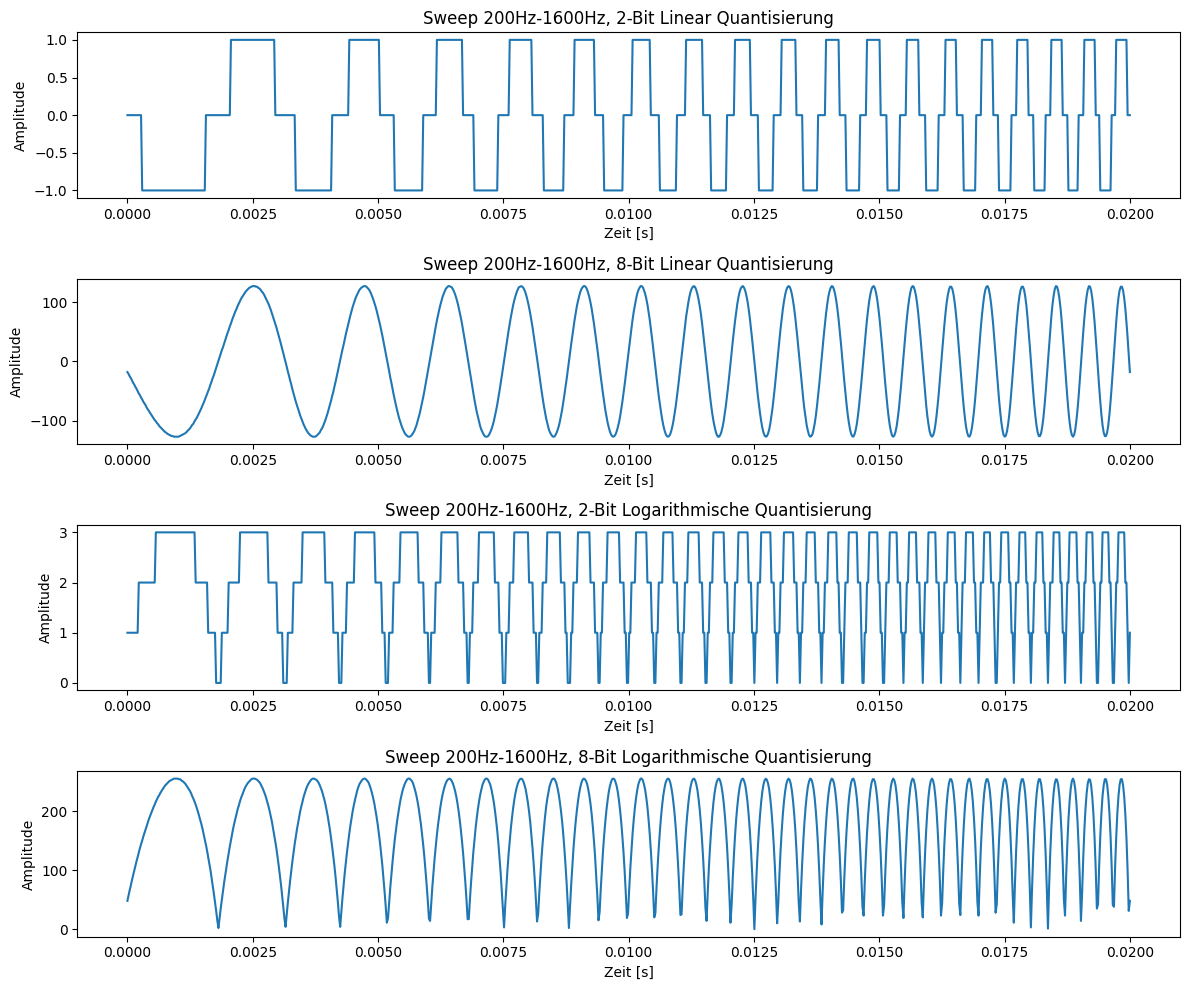

In [238]:
def linear_quantize(signal, num_bits):
    """Lineare Quantisierung."""
    max_val = np.max(np.abs(signal))
    quantized = np.round(signal / max_val * (2**(num_bits-1) - 1))
    return quantized

def log_quantize(signal, num_bits):
    """Logarithmische Quantisierung."""
    signal_log = np.log(np.abs(signal) + 1)
    scale = np.log(np.max(signal) + 1) / (2**num_bits - 1)
    quantized = np.round(signal_log / scale)
    return quantized, scale, np.sign(signal)

# Quantisierung
sweep1_2bit_linear = linear_quantize(sweep1, 2)
sweep1_8bit_linear = linear_quantize(sweep1, 8)
sweep1_2bit_log, scale_2bit, pol_2bit = log_quantize(sweep1, 2)
sweep1_8bit_log, scale_8bit, pol_8bit = log_quantize(sweep1, 8)

# Plotten der quantisierten Signale
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(time, sweep1_2bit_linear)
plt.title('Sweep 200Hz-1600Hz, 2-Bit Linear Quantisierung')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(time, sweep1_8bit_linear)
plt.title('Sweep 200Hz-1600Hz, 8-Bit Linear Quantisierung')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 3)
plt.plot(time, sweep1_2bit_log)
plt.title('Sweep 200Hz-1600Hz, 2-Bit Logarithmische Quantisierung')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 4)
plt.plot(time, sweep1_8bit_log)
plt.title('Sweep 200Hz-1600Hz, 8-Bit Logarithmische Quantisierung')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


d) Rekonstruierung der Signale und Plotten des Rauschens

SNR 2-Bit Linear: 8.92 dB
SNR 8-Bit Linear: 50.00 dB
SNR 2-Bit Logarithmisch: 17.18 dB
SNR 8-Bit Logarithmisch: 55.00 dB


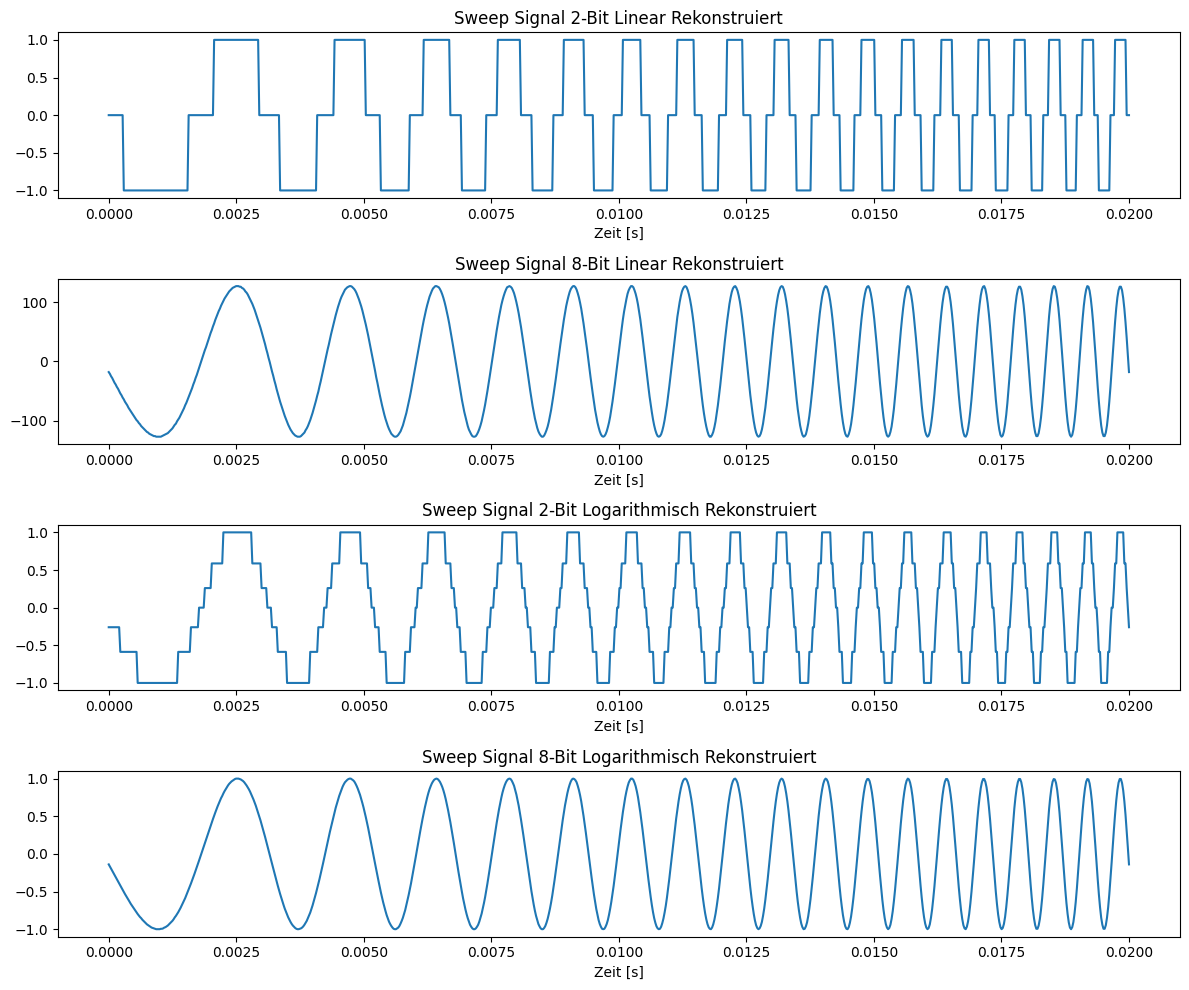

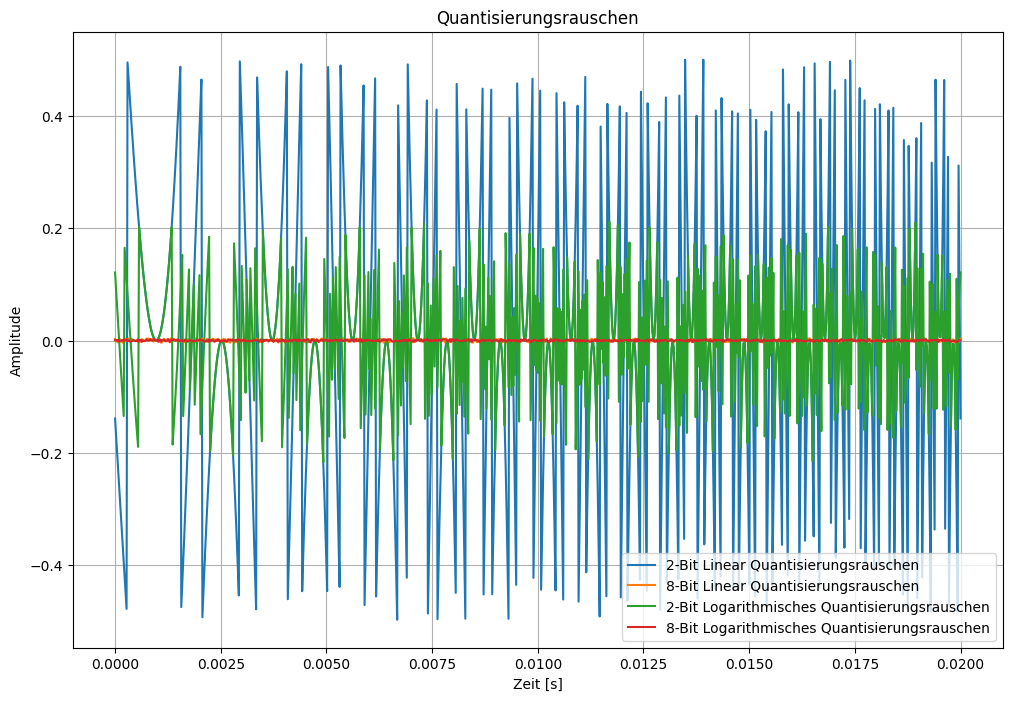

In [239]:
def decode_lin(quantized, max_val, num_bits):
    """Rekonstruiere das quantisierte Signal."""
    return quantized * max_val / (2**(num_bits-1) - 1)

def decode_log(c_signal, scale, pol):
    return pol * (np.exp(c_signal * scale) - 1)

# Rekonstruktion der Signale
sweep1_reconstructed_2bit_linear = decode_lin(sweep1_2bit_linear, np.max(np.abs(sweep1)), 2)
sweep1_reconstructed_8bit_linear = decode_lin(sweep1_8bit_linear, np.max(np.abs(sweep1)), 8)
sweep1_reconstructed_2bit_log = decode_log(sweep1_2bit_log, scale_2bit, pol_2bit)
sweep1_reconstructed_8bit_log = decode_log(sweep1_8bit_log, scale_8bit, pol_8bit)

# Quantisierungsrauschen
noise_2bit_linear = sweep1 - sweep1_reconstructed_2bit_linear
noise_8bit_linear = sweep1 - sweep1_reconstructed_8bit_linear
noise_2bit_log = sweep1 - sweep1_reconstructed_2bit_log
noise_8bit_log = sweep1 - sweep1_reconstructed_8bit_log

# SNR-Berechnung
def calculate_snr(signal, noise):
    signal_power = np.mean(signal**2)
    noise_power = np.mean(noise**2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

snr_2bit_linear = calculate_snr(sweep1, noise_2bit_linear)
snr_8bit_linear = calculate_snr(sweep1, noise_8bit_linear)
snr_2bit_log = calculate_snr(sweep1, noise_2bit_log)
snr_8bit_log = calculate_snr(sweep1, noise_8bit_log)

print(f'SNR 2-Bit Linear: {snr_2bit_linear:.2f} dB')
print(f'SNR 8-Bit Linear: {snr_8bit_linear:.2f} dB')
print(f'SNR 2-Bit Logarithmisch: {snr_2bit_log:.2f} dB')
print(f'SNR 8-Bit Logarithmisch: {snr_8bit_log:.2f} dB')

# Plotten des Quantisierungsrauschens
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(time, sweep1_2bit_linear)
plt.title("Sweep Signal 2-Bit Linear Rekonstruiert")
plt.xlabel('Zeit [s]')

plt.subplot(4, 1, 2)
plt.plot(time, sweep1_8bit_linear)
plt.title("Sweep Signal 8-Bit Linear Rekonstruiert")
plt.xlabel('Zeit [s]')

plt.subplot(4, 1, 3)
plt.plot(time, sweep1_reconstructed_2bit_log)
plt.title("Sweep Signal 2-Bit Logarithmisch Rekonstruiert")
plt.xlabel('Zeit [s]')

plt.subplot(4, 1, 4)
plt.plot(time, sweep1_reconstructed_8bit_log)
plt.title("Sweep Signal 8-Bit Logarithmisch Rekonstruiert")
plt.xlabel('Zeit [s]')

plt.tight_layout()

plt.figure(figsize=(12, 8))
plt.plot(time, noise_2bit_linear, label='2-Bit Linear Quantisierungsrauschen')
plt.plot(time, noise_8bit_linear, label='8-Bit Linear Quantisierungsrauschen')
plt.plot(time, noise_2bit_log, label='2-Bit Logarithmisches Quantisierungsrauschen')
plt.plot(time, noise_8bit_log, label='8-Bit Logarithmisches Quantisierungsrauschen')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.title('Quantisierungsrauschen')
plt.legend()
plt.grid(True)
plt.show()


e) Plotten von eigenem Signal

Text(0.5, 1.0, 'Leistungsspektrum')

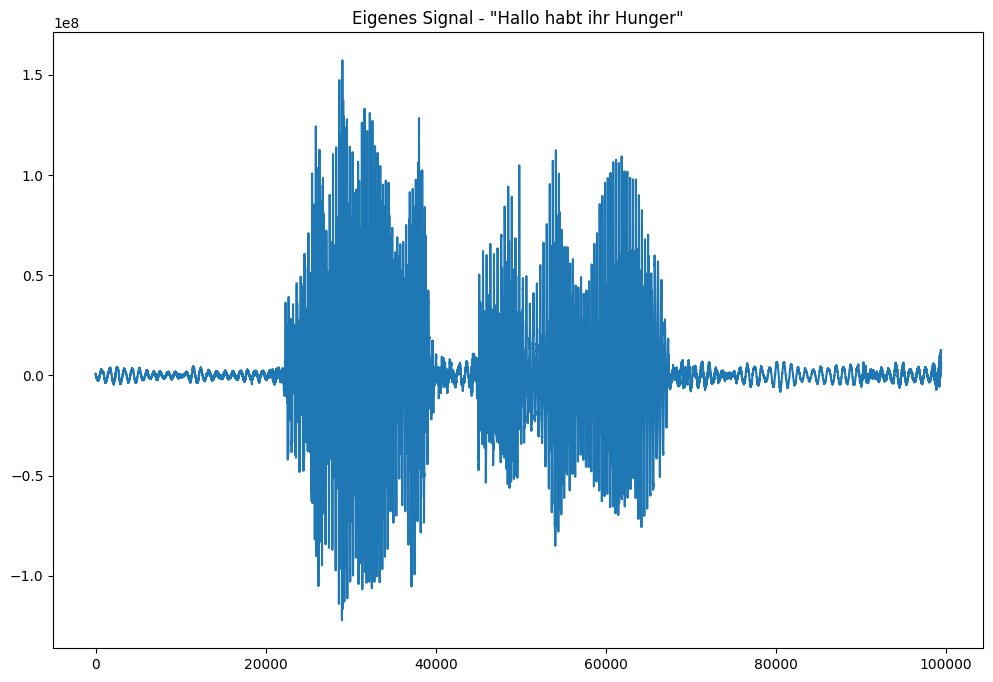

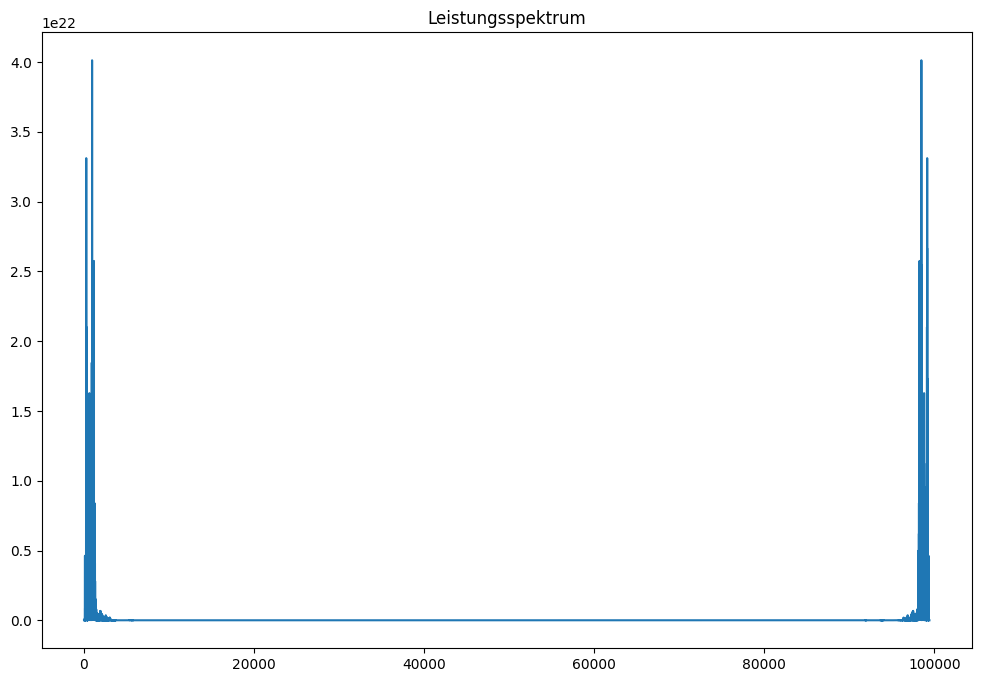

In [240]:
from scipy.io import wavfile

samplerate, data = wavfile.read('eigenes_signal.wav')

plt.figure(figsize=(12, 8))
plt.plot(data)
plt.title('Eigenes Signal - "Hallo habt ihr Hunger"')
plt.figure(figsize=(12, 8))
plt.plot(np.abs(np.fft.fft(data))**2)
plt.title("Leistungsspektrum")

f) Quantisierung des Signals

Text(0.5, 1.0, 'Logarithmische Quantisierung 8-Bit Dekodiert')

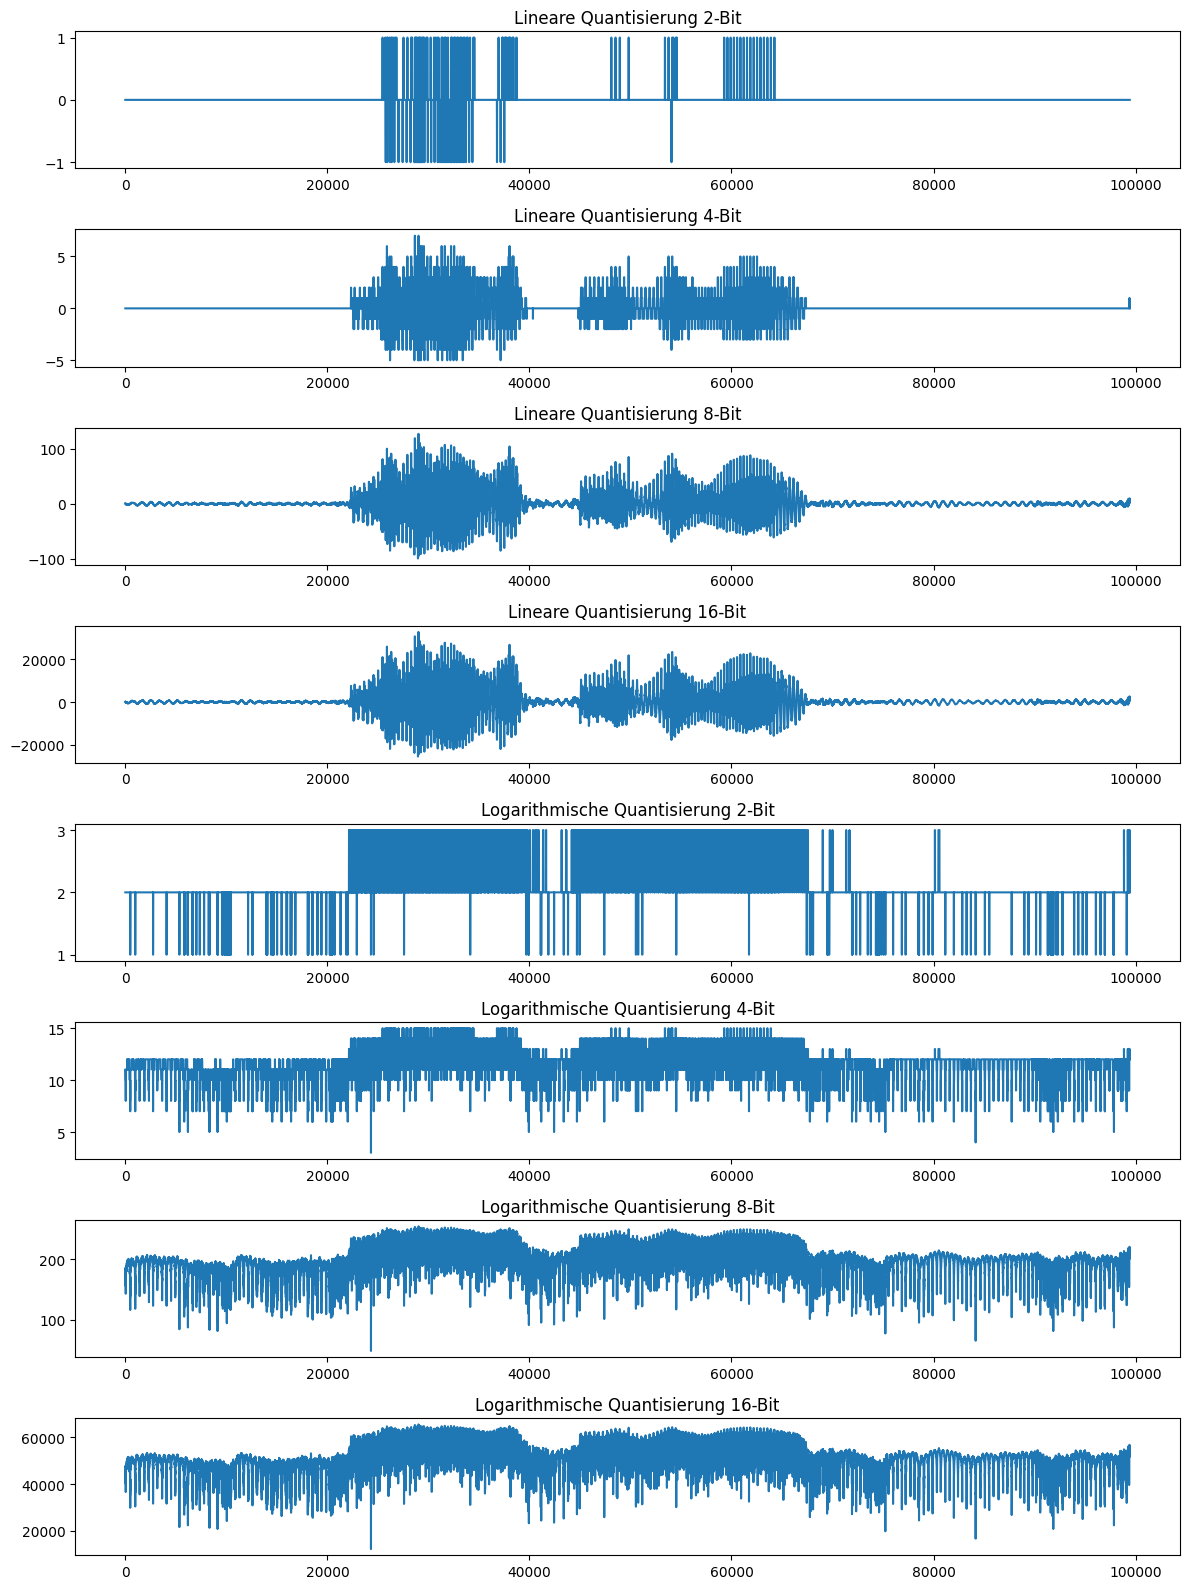

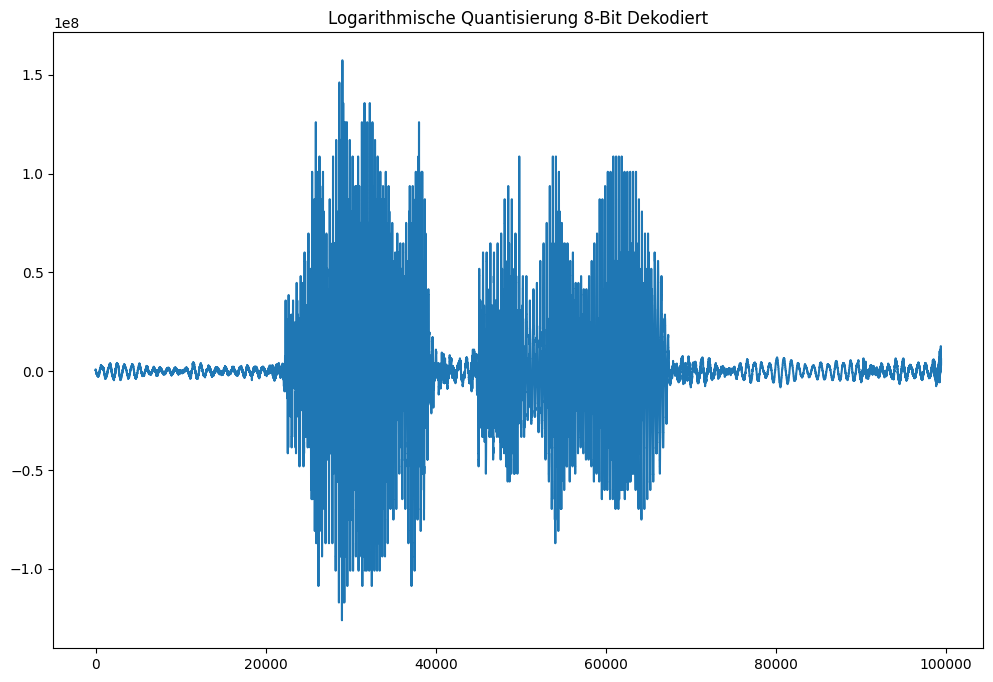

In [241]:
plt.figure(figsize=(12, 16))

plt.subplot(8, 1, 1)
lin_quantized_2bit = linear_quantize(data, 2)
plt.plot(lin_quantized_2bit)
plt.title("Lineare Quantisierung 2-Bit")

plt.subplot(8, 1, 2)
lin_quantized_4bit = linear_quantize(data, 4)
plt.plot(lin_quantized_4bit)
plt.title("Lineare Quantisierung 4-Bit")

plt.subplot(8, 1, 3)
lin_quantized_8bit = linear_quantize(data, 8)
plt.plot(lin_quantized_8bit)
plt.title("Lineare Quantisierung 8-Bit")

plt.subplot(8, 1, 4)
lin_quantized_16bit = linear_quantize(data, 16)
plt.plot(lin_quantized_16bit)
plt.title("Lineare Quantisierung 16-Bit")

plt.subplot(8, 1, 5)
log_quantized_2bit, scale_2bit, pol_2bit = log_quantize(data, 2)
plt.plot(log_quantized_2bit)
plt.title("Logarithmische Quantisierung 2-Bit")

plt.subplot(8, 1, 6)
log_quantized_4bit, scale_4bit, pol_4bit = log_quantize(data, 4)
plt.plot(log_quantized_4bit)
plt.title("Logarithmische Quantisierung 4-Bit")

plt.subplot(8, 1, 7)
log_quantized_8bit, scale_8bit, pol_8bit = log_quantize(data, 8)
plt.plot(log_quantized_8bit)
plt.title("Logarithmische Quantisierung 8-Bit")

plt.subplot(8, 1, 8)
log_quantized_16bit, scale_16bit, pol_16bit = log_quantize(data, 16)
plt.plot(log_quantized_16bit)
plt.title("Logarithmische Quantisierung 16-Bit")
plt.tight_layout()

#Zum Test wird ein Signal dekodiert
plt.figure(figsize=(12, 8))
plt.plot(decode_log(log_quantized_8bit, scale_8bit, pol_8bit))
plt.title("Logarithmische Quantisierung 8-Bit Dekodiert")

Es folgen die Ausgaben der dekodierten Signale. Wie man am Diagramm oben erkennen kann funktioniert die Dekodierung so wie sie sollte doch wenn man die dekodierten Signale als .wav Dateien speichert ist das Signal sehr übersteuert und rauschig. Ich denke es liegt an der Abtastrate aber ich weiß es nicht genau. Ich würde empfehlen die berechneten .wav Dateien nicht anzuhören da sie sehr laut sind und hab sie deswegen auch auskommentiert.

In [242]:
from scipy.io.wavfile import write

#write('2bit_linear.wav', samplerate, decode_lin(lin_quantized_2bit, np.max(np.abs(data)), 2))
#write('4bit_linear.wav', samplerate, decode_lin(lin_quantized_4bit, np.max(np.abs(data)), 4))
#write('8bit_linear.wav', samplerate, decode_lin(lin_quantized_8bit, np.max(np.abs(data)), 8))
#write('16bit_linear.wav', samplerate, decode_lin(lin_quantized_16bit, np.max(np.abs(data)), 16))

#write('2bit_log.wav', samplerate, decode_log(log_quantized_2bit, scale_2bit, pol_2bit))
#write('4bit_log.wav', samplerate, decode_log(log_quantized_4bit, scale_4bit, pol_4bit))
#write('8bit_log.wav', samplerate, decode_log(log_quantized_8bit, scale_8bit, pol_8bit))
#write('16bit_log.wav', samplerate, decode_log(log_quantized_16bit, scale_16bit, pol_16bit))


g) Berechnen des SNRs für jeden Zeitwert

/var/folders/f8/n7j15w316vd5qyhxb5xh7p700000gn/T/ipykernel_82663/1480341807.py:2: RuntimeWarning: divide by zero encountered in divide
  return 10 * np.log10(signal**2 / noise**2)
/var/folders/f8/n7j15w316vd5qyhxb5xh7p700000gn/T/ipykernel_82663/1480341807.py:2: RuntimeWarning: divide by zero encountered in log10
  return 10 * np.log10(signal**2 / noise**2)


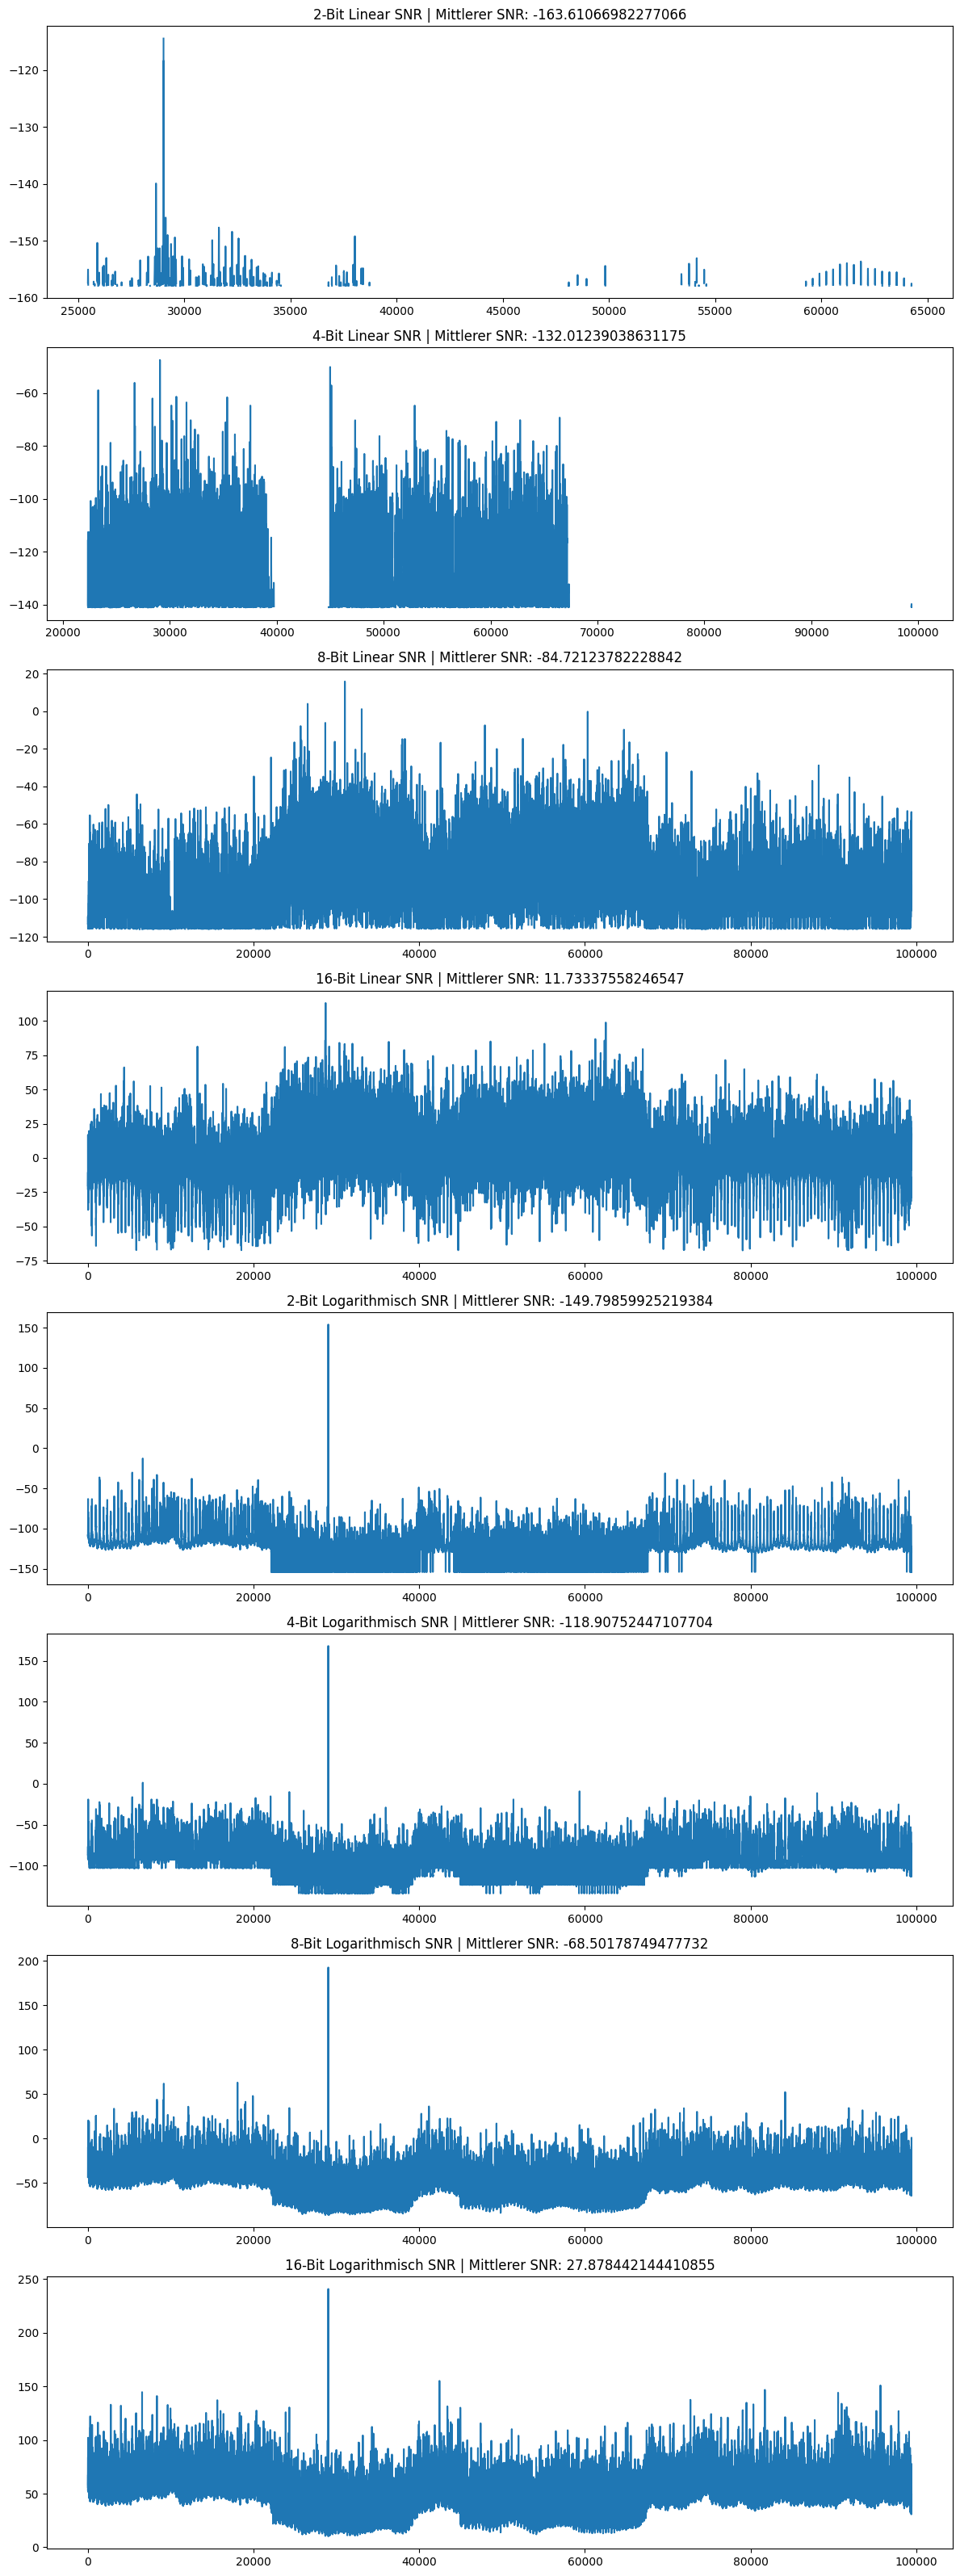

In [272]:
def snr(signal, noise):
    return 10 * np.log10(signal**2 / noise**2)

def median_snr(signal, noise):
    return 10 * np.log10(np.mean(signal**2) / np.mean(noise**2))

plt.figure(figsize=(12, 32))

plt.subplot(8,1,1)
noise_2bit_linear = data - decode_lin(lin_quantized_2bit, np.max(np.abs(data)),2)
plt.plot(snr(lin_quantized_2bit, noise_2bit_linear))
mediansnr = str(median_snr(lin_quantized_2bit, noise_2bit_linear))
plt.title("2-Bit Linear SNR | Mittlerer SNR: " + mediansnr)

plt.subplot(8,1,2)
noise_4bit_linear = data - decode_lin(lin_quantized_4bit, np.max(np.abs(data)),4)
plt.plot(snr(lin_quantized_4bit, noise_4bit_linear))
mediansnr = str(median_snr(lin_quantized_4bit, noise_4bit_linear))
plt.title("4-Bit Linear SNR | Mittlerer SNR: " + mediansnr)

plt.subplot(8,1,3)
noise_8bit_linear = data - decode_lin(lin_quantized_8bit, np.max(np.abs(data)),8)
plt.plot(snr(lin_quantized_8bit, noise_8bit_linear))
mediansnr = str(median_snr(lin_quantized_8bit, noise_8bit_linear))
plt.title("8-Bit Linear SNR | Mittlerer SNR: " + mediansnr)

plt.subplot(8,1,4)
noise_16bit_linear = data - decode_lin(lin_quantized_16bit, np.max(np.abs(data)),16)
plt.plot(snr(lin_quantized_16bit, noise_16bit_linear))
mediansnr = str(median_snr(lin_quantized_16bit, noise_16bit_linear))
plt.title("16-Bit Linear SNR | Mittlerer SNR: " + mediansnr)

plt.subplot(8,1,5)
noise_2bit_log = data - decode_log(log_quantized_2bit, scale_2bit, pol_2bit)
plt.plot(snr(log_quantized_2bit, noise_2bit_log))
mediansnr = str(median_snr(log_quantized_2bit, noise_2bit_log))
plt.title("2-Bit Logarithmisch SNR | Mittlerer SNR: " + mediansnr)

plt.subplot(8,1,6)
noise_4bit_log = data - decode_log(log_quantized_4bit, scale_4bit, pol_4bit)
plt.plot(snr(log_quantized_4bit, noise_4bit_log))
mediansnr = str(median_snr(log_quantized_4bit, noise_4bit_log))
plt.title("4-Bit Logarithmisch SNR | Mittlerer SNR: " + mediansnr)

plt.subplot(8,1,7)
noise_8bit_log = data - decode_log(log_quantized_8bit, scale_8bit, pol_8bit)
plt.plot(snr(log_quantized_8bit, noise_8bit_log))
mediansnr = str(median_snr(log_quantized_8bit, noise_8bit_log))
plt.title("8-Bit Logarithmisch SNR | Mittlerer SNR: " + mediansnr)

plt.subplot(8,1,8)
noise_16bit_log = data - decode_log(log_quantized_16bit, scale_16bit, pol_16bit)
plt.plot(snr(log_quantized_16bit, noise_16bit_log))
mediansnr = str(median_snr(log_quantized_16bit, noise_16bit_log))
plt.title("16-Bit Logarithmisch SNR | Mittlerer SNR: " + mediansnr)

plt.tight_layout()
